In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

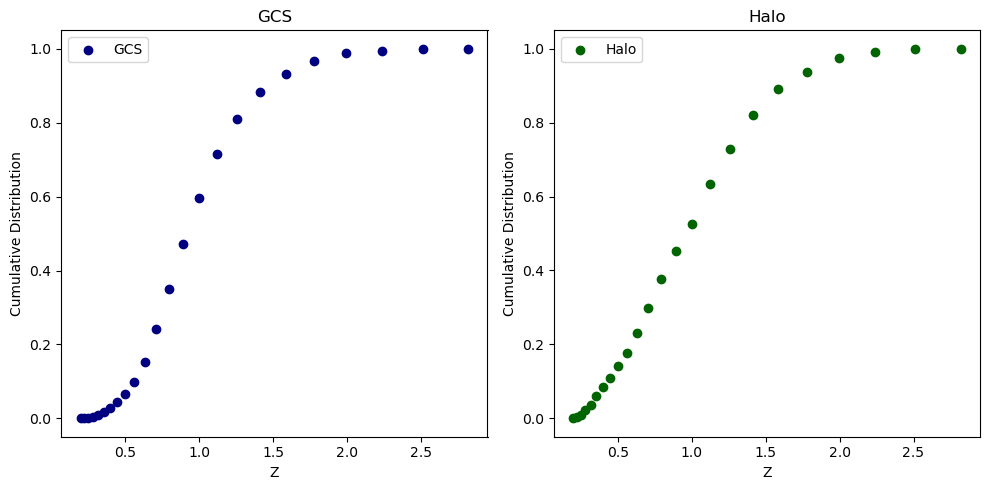

In [82]:
# (a)
data = pd.read_csv('/Users/sehalee/Downloads/abundanceTable.txt', sep='\t')

fe_h_gcs = data.iloc[:, 0]
fractions_gcs = data.iloc[:, 1]
fe_h_halo = data.iloc[:, 2]
fractions_halo = data.iloc[:, 3]

# log10(Z) = [Fe/H]
z_gcs = 10 ** fe_h_gcs
z_halo = 10 ** fe_h_halo

# normalized cumulative distribution
cumulative_gcs = np.cumsum(fractions_gcs)
cumulative_gcs_normalized = cumulative_gcs / cumulative_gcs.iloc[-1]
cumulative_halo = np.cumsum(fractions_halo)
cumulative_halo_normalized = cumulative_halo / cumulative_halo.iloc[-1]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(z_gcs, cumulative_gcs_normalized, label='GCS', color='navy')
ax[0].set_xlabel('Z')
ax[0].set_ylabel('Cumulative Distribution')
ax[0].title.set_text('GCS')
ax[0].legend()

ax[1].scatter(z_gcs, cumulative_halo_normalized, label='Halo', color='darkgreen')
ax[1].set_xlabel('Z')
ax[1].set_ylabel('Cumulative Distribution')
ax[1].title.set_text('Halo')
ax[1].legend()

plt.tight_layout()
plt.show()

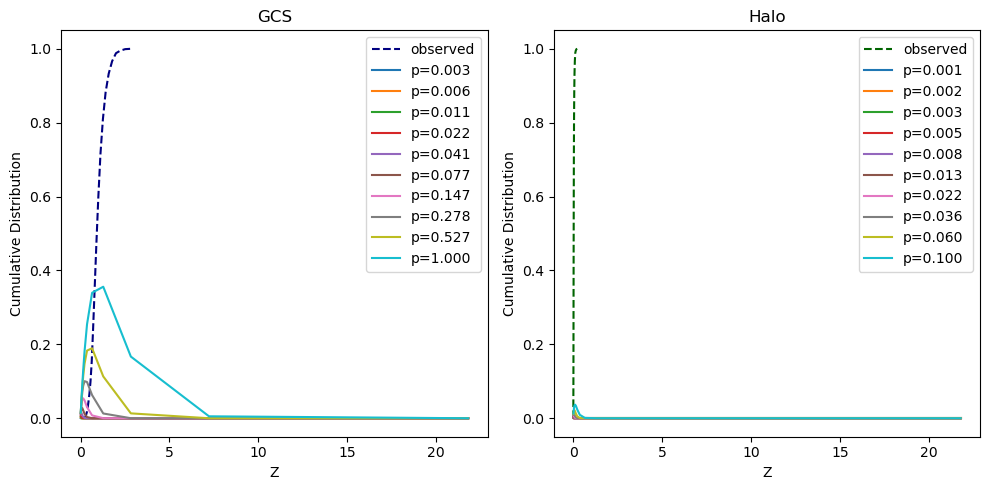

In [99]:
# (b)

def closed_box_cdf(Z, p):
    return Z * np.exp (-Z / p )

p_gcs = np.logspace(-2.5, 0, 10)
p_halo = np.logspace(-3, -1, 10)
FeH = np.logspace(-3, 0.5, 50)
Z = 0.015 * 10 ** FeH

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(z_gcs, cumulative_gcs_normalized, label='observed', color='navy', linestyle='--')
ax[1].plot(z_halo, cumulative_gcs_normalized, label='observed', color='darkgreen', linestyle='--')

for p in p_gcs:
    ax[0].plot(Z, closed_box_cdf(Z, p), label=f'p={p:.3f}')

for p in p_halo:
    ax[1].plot(Z, closed_box_cdf(Z, p), label=f'p={p:.3f}')

ax[0].set_xlabel('Z')
ax[0].set_ylabel('Cumulative Distribution')
ax[0].title.set_text('GCS')
ax[0].legend()

ax[1].set_xlabel('Z')
ax[1].set_ylabel('Cumulative Distribution')
ax[1].title.set_text('Halo')
ax[1].legend()

plt.tight_layout()
plt.show()




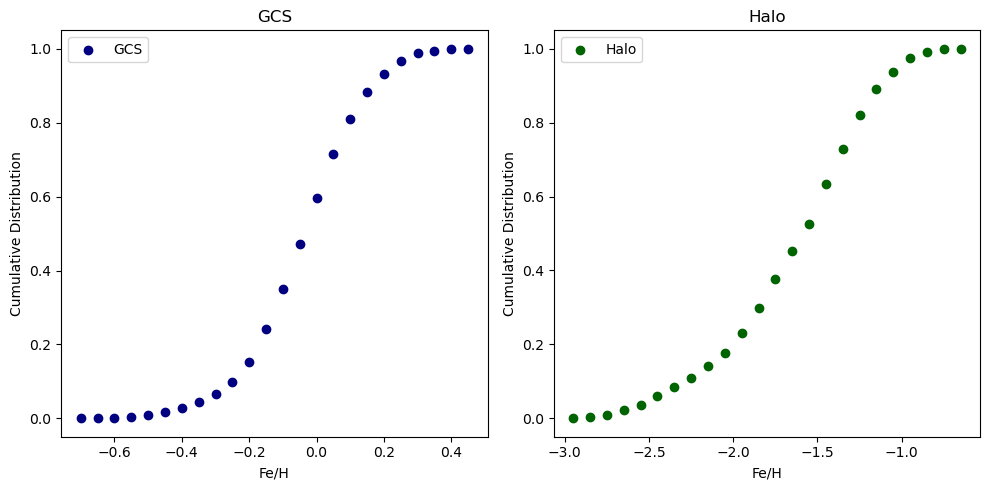

In [83]:
# (a) again but in fe_h

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(fe_h_gcs, cumulative_gcs_normalized, label='GCS', color='navy')
ax[0].set_xlabel('Fe/H')
ax[0].set_ylabel('Cumulative Distribution')
ax[0].title.set_text('GCS')
ax[0].legend()

ax[1].scatter(fe_h_halo, cumulative_halo_normalized, label='Halo', color='darkgreen')
ax[1].set_xlabel('Fe/H')
ax[1].set_ylabel('Cumulative Distribution')
ax[1].title.set_text('Halo')
ax[1].legend()

plt.tight_layout()
plt.show()

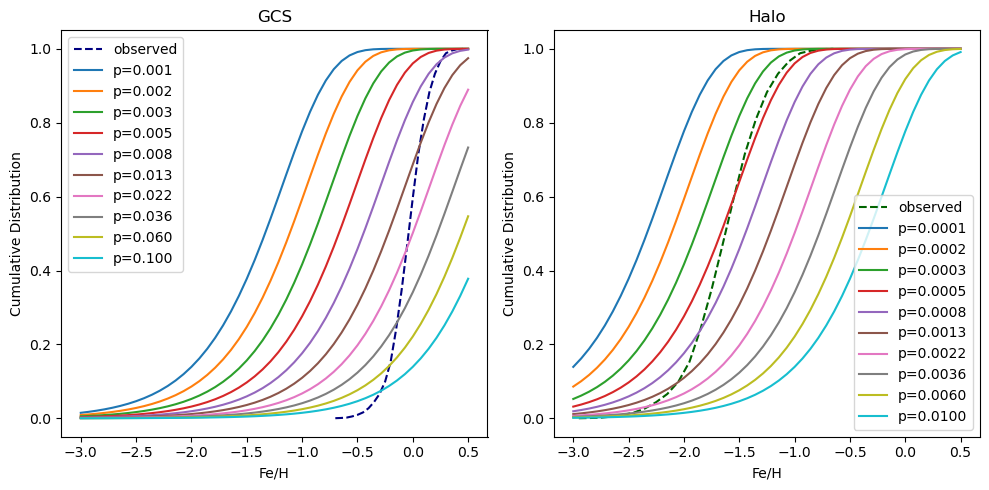

In [114]:
# (b) again but in fe_h


def closed_box_cdf2(fe_h_,p,Z0=0): # (12.37)
    # log10(Z/Z_sun) = [Fe/H], Z_sun = 0.015
    Z = 0.015 * 10 ** fe_h_
    return 1 - np.exp((Z0-Z) / p)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(fe_h_gcs, cumulative_gcs_normalized, label='observed', color='navy', linestyle='--')
ax[1].plot(fe_h_halo, cumulative_gcs_normalized, label='observed', color='darkgreen', linestyle='--')

p_gcs = np.logspace(-3, -1, 10)
p_halo = np.logspace(-4, -2, 10)
FeH = np.linspace(-3, 0.5, 50)

for p in p_gcs:
    ax[0].plot(FeH, closed_box_cdf2(FeH, p), label=f'p={p:.3f}')

for p in p_halo:
    ax[1].plot(FeH, closed_box_cdf2(FeH, p), label=f'p={p:.4f}')

ax[0].set_xlabel('Fe/H')
ax[0].set_ylabel('Cumulative Distribution')
ax[0].title.set_text('GCS')
ax[0].legend()

ax[1].set_xlabel('Fe/H')
ax[1].set_ylabel('Cumulative Distribution')
ax[1].title.set_text('Halo')
ax[1].legend()

plt.tight_layout()
plt.show()


/var/folders/6m/zf_f5yss4dxc7yj9tl4kmfnc0000gn/T/ipykernel_74688/4158951404.py:3: RuntimeWarning: divide by zero encountered in log
  return -np.log(1-Z/p)
/var/folders/6m/zf_f5yss4dxc7yj9tl4kmfnc0000gn/T/ipykernel_74688/4158951404.py:3: RuntimeWarning: invalid value encountered in log
  return -np.log(1-Z/p)


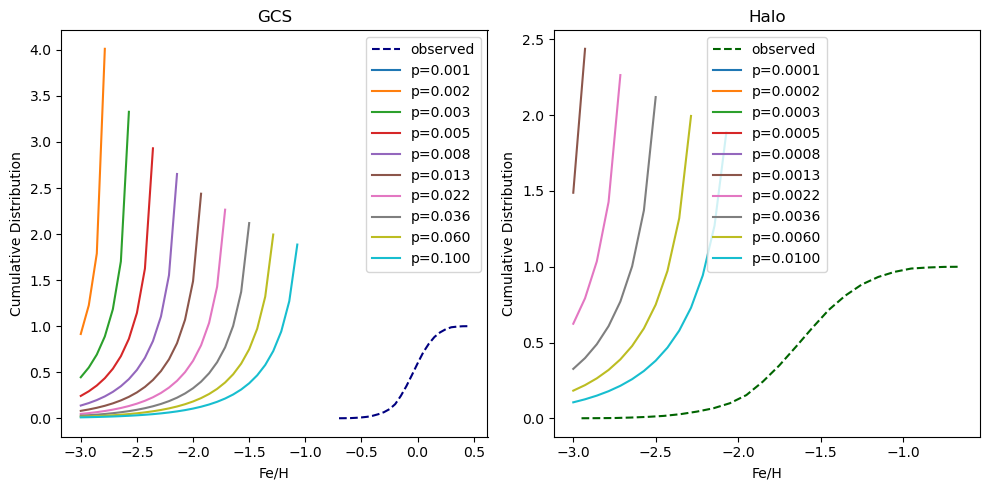

In [115]:

def accretion_cdf(fe_h_,p):
    Z = 10 ** fe_h_
    return -np.log(1-Z/p)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(fe_h_gcs, cumulative_gcs_normalized, label='observed', color='navy', linestyle='--')
ax[1].plot(fe_h_halo, cumulative_gcs_normalized, label='observed', color='darkgreen', linestyle='--')

p_gcs = np.logspace(-3, -1, 10)
p_halo = np.logspace(-4, -2, 10)
FeH = np.linspace(-3, 0.5, 50)

for p in p_gcs:
    ax[0].plot(FeH, accretion_cdf(FeH, p), label=f'p={p:.3f}')
    
for p in p_halo:
    ax[1].plot(FeH, accretion_cdf(FeH, p), label=f'p={p:.4f}')

ax[0].set_xlabel('Fe/H')
ax[0].set_ylabel('Cumulative Distribution')
ax[0].title.set_text('GCS')
ax[0].legend()

ax[1].set_xlabel('Fe/H')
ax[1].set_ylabel('Cumulative Distribution')
ax[1].title.set_text('Halo')    
ax[1].legend()

plt.tight_layout()
plt.show()
